# Logistic Regression 

Logistic Regression is a statistical method for binary classification problems. It predicts the probability of an instance belonging to a particular class using the **sigmoid function**. The sigmoid function maps input values to a range between 0 and 1:

$
\sigma(z) = \frac{1}{1 + e^{-z}}
$

Where:  
- z : Xw + b  
-  x : Input feature(s).  
-  w : Weight (slope of the line).  
-  b : Bias (y-intercept). 

### Binary Classification
For binary classification, logistic regression predicts probabilities and applies a threshold (e.g., 0.5) to classify instances as either class 0 or 1. If value that the sigmoid function generates is higher than the threshold, model predicts 1, and if its less than the threshold, model predicts it to be 0.



#### Weights and Bias

- Weights measure the impact of each input feature. Larger weights indicate stronger influence of the feature.  
- Bias ensures the model can fit the data correctly even when all input features are zero. It adjusts the output to align with the target.

With each iteration, the values of weights and bias get updated until they reach optimal values.

#### Updating values using Gradient Descent

Update weight ( w ): 
  $$ w \leftarrow w - \eta \cdot \frac{\partial L}{\partial w} $$

Update bias ( b ):  
  $$ b \leftarrow b - \eta \cdot \frac{\partial L}{\partial b} $$
Where:  
- $\eta $: Learning rate (controls the step size of parameter updates).  
- $\frac{\partial L}{\partial w} $: Gradient of loss with respect to \( w \).  
- $\frac{\partial L}{\partial b} $: Gradient of loss with respect to \( b \).

Gradients:<br>
$ dw = \frac{1}{m} \cdot X^T (\hat{y} - Y) $

 $ db = \frac{1}{m} \cdot \sum (\hat{y} - Y) $




### Workflow to train the model
1. **Initialize**  
   Initialize **w** and **b** (often to 0 or small random values).

2. **Compute Predictions**  
 $
\sigma(z) = \frac{1}{1 + e^{-z}}
$

3. **Calculate Loss Function and Gradients**  
   $
   \frac{\partial L}{\partial w}, \frac{\partial L}{\partial b}
  $

5. **Update Parameters**  
   Update **w** and **b** using gradient descent formulas.

6. **Repeat**  
   Repeat for the specified number of iterations or until convergence.

In [140]:
import numpy as np

In [141]:
class Logistic_Regression():
    
    def __init__(self, learning_rate, num_of_iterations):
        self.learning_rate=learning_rate
        self.num_of_iterations=num_of_iterations
        
    def fit(self,X,Y):
        self.m,self.n=X.shape # m-> num of rows, n-> features
        self.w= np.zeros(self.n)
        self.b=0
        self.X=X
        self.Y=Y
        
        # implementing Gradient Descent for Optimization
        for i in range(self.num_of_iterations):
            self.update_weights()
            
    def update_weights(self):
        y_hat= 1/(1+np.exp(-(self.X.dot(self.w)+ self.b)))
        
        # calculate gradients dw and db
        dw= (1/self.m)*np.dot(self.X.T,(y_hat-self.Y))
        db= (1/self.m)*np.sum(y_hat-self.Y)
        
        # updating the weights and bias
        self.w=self.w- self.learning_rate*dw
        self.b=self.b-self.learning_rate*db
        
    def predict(self,X): 
        y_pred= 1/(1+np.exp(-(X.dot(self.w)+ self.b)))
        y_pred=np.where( y_pred>1.5,1,0)
        return y_pred

In [142]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [143]:
data=pd.read_csv("diabetes_data.csv")

### Data Preprocessing

In [144]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [145]:
data.shape

(768, 9)

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset contains no null values


#### Data Standardization
Transform data to ensure that features have a mean of 0 and a standard deviation of 1.This ensures that features are scaled appropriately for algorithms that are sensitive to feature magnitudes, such as gradient descent-based methods.

In [147]:
scaler=StandardScaler()
features=data.drop(columns = 'Outcome', axis=1)
features=np.asarray(features)
scaler.fit(features)

StandardScaler()

In [148]:
std_data = scaler.transform(features)

In [149]:
std_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

#### Splitting data into Feature and Target 

In [150]:
features = std_data
target = data['Outcome']

In [151]:
target.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [152]:
#splitting features and target into testing and training sets, with 20% test data size.
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state=2)

### Building and training model

In [153]:
model =Logistic_Regression(learning_rate=0.01, num_of_iterations=1000)

In [154]:
model.fit(X_train, Y_train)

In [155]:
# printing the values weight & bias
print('weight = ', model.w)
print('bias = ', model.b)

weight =  [ 0.33983533  0.8123933  -0.12115335  0.03903535  0.00811976  0.47139923
  0.25171989  0.20708692]
bias =  -0.6013010748260914


A negative weight indicates that the corresponding feature has an inverse relationship with the output. As the value of the feature increases, the predicted probability for the positive class decreases.
A negative bias suggests the model is more likely to predict the negative class when the features don't provide strong evidence for the positive class.

#### Checking model accuracy on test data

In [156]:
X_test_prediction =model.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)
print(f'Accuracy score of the test data : {test_data_accuracy:.2f}')

Accuracy score of the test data : 0.71


#### Checking model prediction on new data

In [157]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_new_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_new_data)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is not diabetic


### Comparing with sklearns's LogisticRegression
Scikit-learn's LogisticRegression does not use gradient descent by default to fit the model. Instead, it uses optimization techniques such as liblinear, newton-cg, lbfgs, or saga, which are more advanced and efficient for logistic regression.

In [158]:
from sklearn.linear_model import LogisticRegression

model2= LogisticRegression()
model2.fit(X_train,Y_train)
predictions = model2.predict(X_test)

In [159]:
from sklearn.metrics import accuracy_score

# Predicted values
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test,predictions)

print(f'Accuracy score of the developed model : {test_data_accuracy:.2f}')
print(f"Accuracy score of sklearn's model: {accuracy:.2f}")


Accuracy score of the developed model : 0.71
Accuracy score of sklearn's model: 0.77


#### How weights influence importance of a feature
Check the feature importance graph, and the weights.

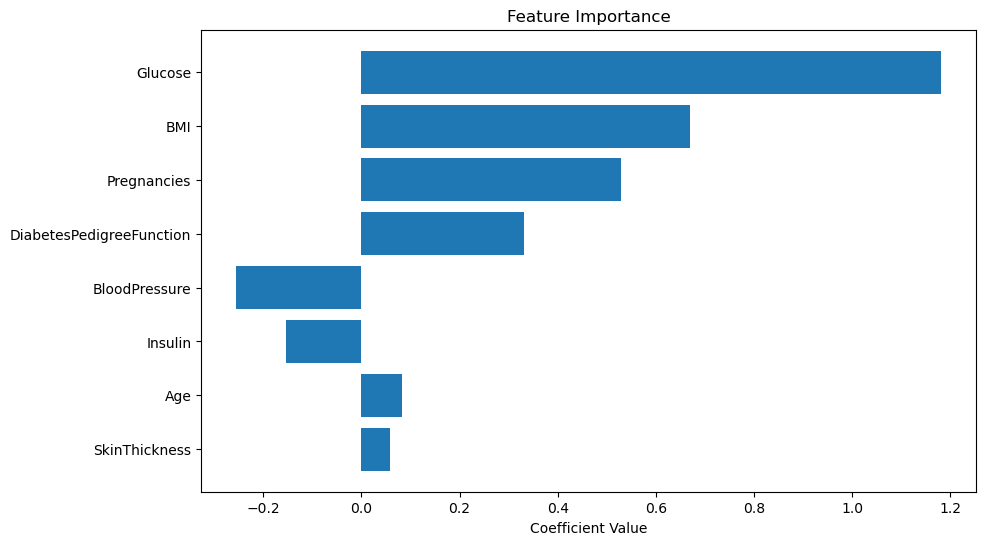

In [173]:
import matplotlib.pyplot as plt
coefficients = model2.coef_[0]
features = data.columns  # assuming X is a DataFrame

# Sort coefficients by magnitude
sorted_idx = np.argsort(np.abs(coefficients))

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], coefficients[sorted_idx])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()

In [205]:
i=0
for col in data.columns[:7]:
    print(f'{col} : {model.w[i]:.3f}')
    i=i+1

Pregnancies : 0.340
Glucose : 0.812
BloodPressure : -0.121
SkinThickness : 0.039
Insulin : 0.008
BMI : 0.471
DiabetesPedigreeFunction : 0.252


We can infer from the graph that the feature 'Glucose' has the highest importance out of all, in determining wheter a person is diabetic or not. The weight associated to it is thus the highest of all features.